Detecting 1 CUDA device(s).


(0.0, 1.0, 0.0, 1.0)

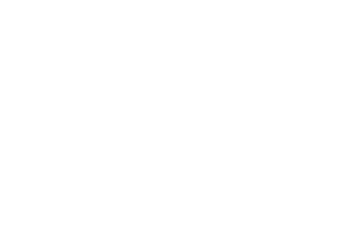

In [1]:
import cdt
from cdt import SETTINGS
import pandas as pd
from cdt.independence.graph import FSGNN
from pandas import Series,DataFrame
from sklearn.datasets import load_boston
SETTINGS.verbose=True
#SETTINGS.NJOBS=16
#SETTINGS.GPU=1
import networkx as nx
import matplotlib.pyplot as plt
plt.axis('off')

In [5]:
# Load data
data_clear = pd.read_csv('data/data_clear.csv')
data_test = pd.read_csv('data/data_normalization.csv')

name_list = ['avg_identifier_length','max_identifier_length','avg_identifier','max_identifier','max_single_identifier'
        ,'avg_arithmetic','avg_comparison','avg_assignment','avg_comma','avg_dot','avg_bracket','max_keyword'
        ,'avg_keyword','max_number','avg_number','avg_loop','avg_if','avg_space','max_indentation'
        ,'avg_indentation','avg_comment','max_single_char','avg_blank','max_line_length','avg_line_length'
       ]

# 总共25个因子

In [6]:
data = data_clear
data.drop(['id'],axis = 1, inplace = True)
index = data[data['score'] == 0].index
data.drop(index, axis = 0, inplace= True)

df_target = Series(data['score'])
df_features = data
df_features.drop(['score'],axis = 1, inplace = True)
df_features.head()

,avg_identifier_length,max_identifier_length,avg_identifier,max_identifier,max_single_identifier,avg_arithmetic,avg_comparison,avg_assignment,avg_comma,avg_dot,...,avg_loop,avg_if,avg_space,max_indentation,avg_indentation,avg_comment,max_single_char,avg_blank,max_line_length,avg_line_length
0,6.8889,13,1.1818,5,4,0.0000,0.0000,0.1818,0.0909,0.1818,...,0.0000,0.0909,1.0909,6,3.2000,0.0000,17,0.0909,59,26.4545
1,9.0000,24,1.2308,4,4,0.0000,0.0000,0.0000,0.0000,0.5385,...,0.0000,0.0769,1.1538,3,2.0000,0.0769,26,0.0000,52,26.5385
2,8.6000,36,3.1111,6,4,0.3333,0.1111,0.1111,0.1111,1.0000,...,0.1111,0.2222,3.4444,5,2.6667,0.0000,47,0.0000,118,57.1111
3,9.5000,22,0.7500,2,2,0.2500,0.1250,0.1250,0.0000,0.0000,...,0.0000,0.1250,1.6250,4,1.8571,0.0000,13,0.1250,62,22.5000
4,7.4444,16,1.3750,5,2,0.0000,0.0000,0.0000,0.1250,0.5000,...,0.0000,0.0000,0.1250,2,1.4286,0.0000,9,0.1250,47,16.7500


In [8]:
# 原始数据
rank_sort = {}
for epoch in range(50):
    obj = cdt.independence.graph.DecisionTreeRegression()
    output = obj.predict_features(df_features, df_target)
    i = 0
    dict = {}
    for result in output:
        dict[name_list[i]] = result
        i += 1
    rank = 25
    for item in sorted(dict.items(), key=lambda x: x[1]):
        if epoch == 0:
            rank_sort[item[0]] = 0
        rank_sort[item[0]] += rank
        rank -= 1    
for i in rank_sort.items():
    print(i)

('max_number', 1201)
('max_keyword', 1083)
('avg_arithmetic', 1110)
('avg_loop', 1220)
('max_identifier_length', 1045)
('avg_line_length', 861)
('avg_identifier_length', 840)
('max_single_identifier', 953)
('avg_indentation', 819)
('avg_blank', 832)
('max_line_length', 760)
('avg_space', 657)
('avg_comma', 698)
('max_identifier', 552)
('avg_comparison', 545)
('avg_number', 783)
('avg_if', 401)
('avg_assignment', 426)
('avg_bracket', 390)
('avg_keyword', 324)
('avg_dot', 250)
('max_single_char', 168)
('max_indentation', 182)
('avg_identifier', 100)
('avg_comment', 50)


In [ ]:
data = data_test
data.drop(['id'],axis = 1, inplace = True)
index = data[data['score'] == 0].index
data.drop(index, axis = 0, inplace= True)

df_target = Series(data['score'])
df_features = data
df_features.drop(['score'],axis = 1, inplace = True)
df_features.head()

In [ ]:
# 原始数据
rank_sort = {}
for epoch in range(50):
    obj = cdt.independence.graph.DecisionTreeRegression()
    output = obj.predict_features(df_features, df_target)
    i = 0
    dict = {}
    for result in output:
        dict[name_list[i]] = result
        i += 1
    if epoch == 0:
        for item in sorted(dict.items(), key=lambda x: x[1]):
            print(item)
        print("\n**********\n")
    rank = 25
    for item in sorted(dict.items(), key=lambda x: x[1]):
        if epoch == 0:
            rank_sort[item[0]] = 0
        rank_sort[item[0]] += rank
        rank -= 1    
print(rank_sort)

In [ ]:
data = pd.read_csv("data/normal_data.csv")

data.drop(['id'],axis = 1, inplace = True)
index = data[data['score'] == 0].index
data.drop(index, axis = 0, inplace= True)
data.head()

df_target = Series(data['score'])
df_features = data
df_features.drop(['score'],axis = 1, inplace = True)
df_features.head()

In [ ]:
# 原始数据
rank_sort = {}
for epoch in range(50):
    obj = cdt.independence.graph.DecisionTreeRegression()
    output = obj.predict_features(df_features, df_target)
    i = 0
    dict = {}
    for result in output:
        dict[name_list[i]] = result
        i += 1
    rank = 25
    for item in sorted(dict.items(), key=lambda x: x[1]):
        if epoch == 0:
            rank_sort[item[0]] = 0
        rank_sort[item[0]] += rank
        rank -= 1    
print(rank_sort)